# Descriptions
- Prediksi yang dilakukan adalah klasifikasi untuk target churn (1-Yes atau 0-No) dan Regresi untuk target tenure.
- Prediksi dengan klasifikasi menggunakan model machine learning
- Prediksi dengan regresi menggunakan model machine learning

# Import modules

In [16]:
import pandas as pd
import numpy as np
from sklearn import tree

# Initialize and load dataset
Terdapat tiga dataset, antara lain:
- EDA_df, yaitu dataset yang merupakan hasil dari eksplorasi terhadap fitur-fitur, yang telah bersih dari outlier, missing, duplikat, dan mismatch.
- feature_engineering_telco_customer_churn, yaitu dataset yang merupakan hasil dari feature engieering yang meliputi, feature transformation, feature extraction, dan feture selection.
- PCA_telco_customer_churn.csv adalah hasil reduki fitur menggunakan metode PCA (Principal Component Analysis).

## EDA

In [2]:
EDA_train_df = pd.read_csv('../datasets/train/EDA_train.csv')
EDA_test_df = pd.read_csv('../datasets/test/EDA_test.csv')

## Feature Engineering

In [3]:
feature_engineering_train_df = pd.read_csv('../datasets/train/feature_engineering_train.csv')
feature_engineering_test_df = pd.read_csv('../datasets/test/feature_engineering_test.csv')

In [4]:
feature_engineering_train_df

,senior_citizen,dependents,tenure,multiple_lines,streaming_tv,streaming_movies,paperless_billing,payment_method,monthly_charges
0,0,0,21,1,1,0,0,3,64.85
1,0,0,54,0,0,0,1,0,97.20
2,0,0,1,0,1,1,1,2,23.45
3,0,0,4,1,1,1,1,2,70.20
4,0,0,0,0,1,1,1,0,61.90
...,...,...,...,...,...,...,...,...,...
5629,0,0,1,1,0,0,1,2,95.00
5630,0,0,23,0,0,0,1,1,91.10
5631,0,0,12,1,0,0,1,2,21.15
5632,1,0,12,0,0,0,1,2,99.45


## PCA

In [5]:
PCA_train_df = pd.read_csv('../datasets/train/PCA_train.csv')
PCA_test_df = pd.read_csv('../datasets/test/PCA_test.csv')

# Build model

## Support Vector Classifier

## Decision Tree

### Train Dataset

In [7]:
X_train = EDA_train_df.loc[:, ['gender','senior_citizen','partner','dependents','tenure','phone_service', 
'multiple_lines','internet_service','online_security','device_protection','tech_support',
'streaming_tv','streaming_movies','contract','paperless_billing','payment_method',
'monthly_charges','total_charges']]

y_train = EDA_train_df.loc[:, 'churn']

### Initialize parameter model

In [22]:
# Create Decision Tree classifer object
clf = tree.DecisionTreeClassifier()
# Train Decision Tree Classiferb
clf = clf.fit(X_train,y_train)


### Show

[Text(210.49526328288007, 213.25846153846155, 'X[13] <= 0.5\ngini = 0.39\nsamples = 5634\nvalue = [4138, 1496]'),
 Text(118.04836277592707, 204.89538461538461, 'X[16] <= 68.625\ngini = 0.489\nsamples = 3083\nvalue = [1768, 1315]'),
 Text(60.51295404969651, 196.53230769230768, 'X[4] <= 3.5\ngini = 0.419\nsamples = 1304\nvalue = [915, 389]'),
 Text(30.56060792867982, 188.16923076923078, 'X[7] <= 1.5\ngini = 0.497\nsamples = 456\nvalue = [246, 210]'),
 Text(20.38255880121396, 179.80615384615385, 'X[9] <= 0.5\ngini = 0.494\nsamples = 286\nvalue = [128, 158]'),
 Text(14.854950682852808, 171.44307692307692, 'X[16] <= 46.075\ngini = 0.499\nsamples = 260\nvalue = [123, 137]'),
 Text(11.272192716236722, 163.07999999999998, 'X[12] <= 0.5\ngini = 0.477\nsamples = 150\nvalue = [59, 91]'),
 Text(9.504628224582701, 154.71692307692308, 'X[16] <= 45.625\ngini = 0.488\nsamples = 137\nvalue = [58, 79]'),
 Text(6.985584218512899, 146.35384615384615, 'X[14] <= 0.5\ngini = 0.496\nsamples = 121\nvalue = [55

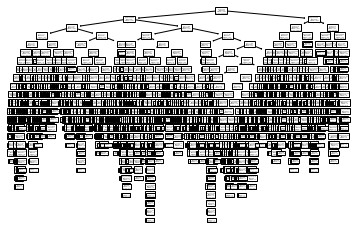

In [19]:
tree.plot_tree(clf)

#### Save as PDF

In [21]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("tree-telco")

'tree-telco.pdf'

## Random Forest